In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('counterfeit_train.csv')
dft=pd.read_csv('counterfeit_test.csv')


In [3]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,NaN,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,NaN,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [4]:
df.describe()

,Counterfeit_Weight,Active_Since,Medicine_MRP,Availability_rating,Counterfeit_Sales
count,5652.000000,6818.000000,6818.000000,6818.000000,6818.000000
mean,14.115057,1995.836316,151.401518,0.079174,2280.583480
std,4.649668,8.368979,62.203961,0.051481,1693.354404
min,5.855000,1983.000000,41.790000,0.013000,146.290000
25%,9.995000,1985.000000,104.509400,0.040058,933.265600
50%,13.800000,1997.000000,153.195700,0.066955,1902.670400
75%,18.050000,2002.000000,196.148350,0.107697,3207.638400
max,22.650000,2007.000000,277.188400,0.341391,13199.964800


In [5]:
df.loc[df['Counterfeit_Weight'].idxmax()]

Medicine_ID                         KFD15
Counterfeit_Weight                  22.65
DistArea_ID                       Area010
Active_Since                         1996
Medicine_MRP                      106.509
Medicine_Type                 Antibiotics
SidEffect_Level                      mild
Availability_rating              0.143127
Area_Type              MidTownResidential
Area_City_Type                     Tier 3
Area_dist_level                   Unknown
Counterfeit_Sales                 303.419
Name: 388, dtype: object

In [6]:
df.loc[df['Counterfeit_Weight'].isnull(),'Counterfeit_Weight']=df['Counterfeit_Weight'].mean()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6818 entries, 0 to 6817
Data columns (total 12 columns):
Medicine_ID            6818 non-null object
Counterfeit_Weight     6818 non-null float64
DistArea_ID            6818 non-null object
Active_Since           6818 non-null int64
Medicine_MRP           6818 non-null float64
Medicine_Type          6818 non-null object
SidEffect_Level        6818 non-null object
Availability_rating    6818 non-null float64
Area_Type              6818 non-null object
Area_City_Type         6818 non-null object
Area_dist_level        6818 non-null object
Counterfeit_Sales      6818 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 639.3+ KB


In [8]:
df.head()

,Medicine_ID,Counterfeit_Weight,DistArea_ID,Active_Since,Medicine_MRP,Medicine_Type,SidEffect_Level,Availability_rating,Area_Type,Area_City_Type,Area_dist_level,Counterfeit_Sales
0,RRA15,13.100000,Area046,1995,160.2366,Antimalarial,critical,0.070422,DownTown,Tier 1,Small,1775.5026
1,YVV26,14.115057,Area027,1983,110.4384,Mstablizers,mild,0.013000,CityLimits,Tier 3,Medium,3069.1520
2,LJC15,9.025000,Area046,1995,259.4092,Cardiac,mild,0.060783,DownTown,Tier 1,Small,2603.0920
3,GWC40,11.800000,Area046,1995,99.9830,OralContraceptives,mild,0.065555,DownTown,Tier 1,Small,1101.7130
4,QMN13,14.115057,Area019,1983,56.4402,Hreplacements,critical,0.248859,MidTownResidential,Tier 1,Small,158.9402


In [9]:
df['DistArea_ID'].value_counts()

Area017    760
Area046    749
Area013    749
Area035    748
Area049    739
Area045    736
Area027    735
Area018    729
Area010    442
Area019    431
Name: DistArea_ID, dtype: int64

In [10]:
dft['DistArea_ID'].value_counts()

Area027    200
Area018    199
Area045    193
Area049    191
Area013    183
Area035    182
Area046    181
Area017    166
Area010    113
Area019     97
Name: DistArea_ID, dtype: int64

In [11]:
df['Active_Since'].value_counts()

1983    1166
2005     760
1995     749
1985     749
2002     748
1997     739
2000     736
2007     729
1996     442
Name: Active_Since, dtype: int64

In [12]:
dft['Active_Since'].value_counts()

1983    297
2007    199
2000    193
1997    191
1985    183
2002    182
1995    181
2005    166
1996    113
Name: Active_Since, dtype: int64

In [13]:
df['Active_Since'].value_counts()==df['Active_Since'].value_counts()

1983    True
2005    True
1995    True
1985    True
2002    True
1997    True
2000    True
2007    True
1996    True
Name: Active_Since, dtype: bool

In [14]:
df['Medicine_Type'].value_counts()

Hreplacements         976
Antibiotics           970
Antiseptics           724
OralContraceptives    694
Antipyretics          536
Cardiac               522
Mstablizers           514
Tranquilizers         420
Analgesics            356
Antimalarial          339
Antacids              206
Statins               167
MuscleRelaxants       139
Antifungal            111
Stimulants             95
Antiviral              49
Name: Medicine_Type, dtype: int64

In [15]:
dft['Medicine_Type'].value_counts()

Antibiotics           262
Hreplacements         224
Antiseptics           186
OralContraceptives    162
Antipyretics          146
Mstablizers           134
Cardiac               127
Tranquilizers         100
Analgesics             89
Antimalarial           86
Statins                47
Antacids               45
Antifungal             37
MuscleRelaxants        30
Stimulants             15
Antiviral              15
Name: Medicine_Type, dtype: int64

In [16]:
df['flag']=0
dft['flag']=1

In [17]:
dff=pd.concat([df,dft],0)

In [18]:
dff.head()

,Active_Since,Area_City_Type,Area_Type,Area_dist_level,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,DistArea_ID,Medicine_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,flag
0,1995,Tier 1,DownTown,Small,0.070422,1775.5026,13.100000,Area046,RRA15,160.2366,Antimalarial,critical,0
1,1983,Tier 3,CityLimits,Medium,0.013000,3069.1520,14.115057,Area027,YVV26,110.4384,Mstablizers,mild,0
2,1995,Tier 1,DownTown,Small,0.060783,2603.0920,9.025000,Area046,LJC15,259.4092,Cardiac,mild,0
3,1995,Tier 1,DownTown,Small,0.065555,1101.7130,11.800000,Area046,GWC40,99.9830,OralContraceptives,mild,0
4,1983,Tier 1,MidTownResidential,Small,0.248859,158.9402,14.115057,Area019,QMN13,56.4402,Hreplacements,critical,0


In [19]:
dff.loc[dff['Counterfeit_Weight'].isnull(),'Counterfeit_Weight']=dff['Counterfeit_Weight'].mean()

In [20]:
dff.head()

,Active_Since,Area_City_Type,Area_Type,Area_dist_level,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,DistArea_ID,Medicine_ID,Medicine_MRP,Medicine_Type,SidEffect_Level,flag
0,1995,Tier 1,DownTown,Small,0.070422,1775.5026,13.100000,Area046,RRA15,160.2366,Antimalarial,critical,0
1,1983,Tier 3,CityLimits,Medium,0.013000,3069.1520,14.115057,Area027,YVV26,110.4384,Mstablizers,mild,0
2,1995,Tier 1,DownTown,Small,0.060783,2603.0920,9.025000,Area046,LJC15,259.4092,Cardiac,mild,0
3,1995,Tier 1,DownTown,Small,0.065555,1101.7130,11.800000,Area046,GWC40,99.9830,OralContraceptives,mild,0
4,1983,Tier 1,MidTownResidential,Small,0.248859,158.9402,14.115057,Area019,QMN13,56.4402,Hreplacements,critical,0


In [21]:
dff['DistArea_ID'].value_counts()

Area027    935
Area013    932
Area046    930
Area049    930
Area035    930
Area045    929
Area018    928
Area017    926
Area010    555
Area019    528
Name: DistArea_ID, dtype: int64

In [22]:
dummy1=pd.get_dummies(dff['DistArea_ID'], prefix='DID')

In [23]:
dummy1.head()

,DID_Area010,DID_Area013,DID_Area017,DID_Area018,DID_Area019,DID_Area027,DID_Area035,DID_Area045,DID_Area046,DID_Area049
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0


In [24]:
dff=pd.concat([dff,dummy1],1)

In [25]:
dff=dff.drop(['DID_Area019','DistArea_ID'],1)

In [26]:
dff['Active_Since'].value_counts()

1983    1463
1985     932
1997     930
1995     930
2002     930
2000     929
2007     928
2005     926
1996     555
Name: Active_Since, dtype: int64

In [27]:
dummy1=pd.get_dummies(dff['Active_Since'], prefix='As')

In [28]:
dff=pd.concat([dff,dummy1],1)

In [29]:
dff.head()

,Active_Since,Area_City_Type,Area_Type,Area_dist_level,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,Medicine_ID,Medicine_MRP,Medicine_Type,...,DID_Area049,As_1983,As_1985,As_1995,As_1996,As_1997,As_2000,As_2002,As_2005,As_2007
0,1995,Tier 1,DownTown,Small,0.070422,1775.5026,13.100000,RRA15,160.2366,Antimalarial,...,0,0,0,1,0,0,0,0,0,0
1,1983,Tier 3,CityLimits,Medium,0.013000,3069.1520,14.115057,YVV26,110.4384,Mstablizers,...,0,1,0,0,0,0,0,0,0,0
2,1995,Tier 1,DownTown,Small,0.060783,2603.0920,9.025000,LJC15,259.4092,Cardiac,...,0,0,0,1,0,0,0,0,0,0
3,1995,Tier 1,DownTown,Small,0.065555,1101.7130,11.800000,GWC40,99.9830,OralContraceptives,...,0,0,0,1,0,0,0,0,0,0
4,1983,Tier 1,MidTownResidential,Small,0.248859,158.9402,14.115057,QMN13,56.4402,Hreplacements,...,0,1,0,0,0,0,0,0,0,0


In [30]:
dff=dff.drop(['Active_Since','As_1996'],1)

In [31]:
dff.Medicine_Type.value_counts()


Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
Antacids               251
Statins                214
MuscleRelaxants        169
Antifungal             148
Stimulants             110
Antiviral               64
Name: Medicine_Type, dtype: int64

In [32]:
dff['Medicine_Type']=dff['Medicine_Type'].astype('str')

In [33]:
dff.loc[dff['Medicine_Type'].isin(['Antiviral','Stimulants','Antifungal']),'Medicine_Type']='asa'
dff.Medicine_Type.value_counts() 

Antibiotics           1232
Hreplacements         1200
Antiseptics            910
OralContraceptives     856
Antipyretics           682
Cardiac                649
Mstablizers            648
Tranquilizers          520
Analgesics             445
Antimalarial           425
asa                    322
Antacids               251
Statins                214
MuscleRelaxants        169
Name: Medicine_Type, dtype: int64

In [34]:
dummy1=pd.get_dummies(dff['Medicine_Type'],prefix='MT')

In [35]:
dff=pd.concat([dff,dummy1],1)

In [36]:
dff=dff.drop(['MT_MuscleRelaxants','Medicine_Type'],1)

In [37]:
dff.SidEffect_Level.value_counts()

mild        5517
critical    3006
Name: SidEffect_Level, dtype: int64

In [38]:
dff['mld']=np.where(dff['SidEffect_Level']=='mild',1,0)

In [39]:
dff= dff.drop(['SidEffect_Level'],1)

In [40]:
dff['Area_Type'].value_counts() 

DownTown              5577
MidTownResidential    1083
CityLimits             935
Industrial             928
Name: Area_Type, dtype: int64

In [41]:
k= pd.crosstab(index=dff["Area_Type"],  # Make a crosstab
                      columns=dff["Area_City_Type"])

In [42]:
k

Area_City_Type,Tier 1,Tier 2,Tier 3
Area_Type,,,
CityLimits,0,0,935
DownTown,1860,2785,932
Industrial,0,0,928
MidTownResidential,528,0,555


In [43]:
dummy1=pd.get_dummies( dff['Area_Type'], prefix='AT')

In [44]:
dummy1.head()

,AT_CityLimits,AT_DownTown,AT_Industrial,AT_MidTownResidential
0,0,1,0,0
1,1,0,0,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,1


In [45]:
dff=pd.concat([dff,dummy1],1)

In [46]:
dff=dff.drop(['AT_Industrial', 'Area_Type'],1)

In [47]:
k= pd.crosstab(index=dff["Area_dist_level"],  # Make a crosstab
                      columns=dff["Area_City_Type"])

In [48]:
k

Area_City_Type,Tier 1,Tier 2,Tier 3
Area_dist_level,,,
High,0,0,932
Medium,930,0,1863
Small,1458,930,0
Unknown,0,1855,555


In [49]:
dummy1=pd.get_dummies( dff['Area_City_Type'], prefix='ACT')

dff['Area_City_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Area_City_Type, dtype: int64

In [50]:
dummy1.head()

,ACT_Tier 1,ACT_Tier 2,ACT_Tier 3
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,1,0,0


In [51]:
dff=pd.concat([dff,dummy1],1)

In [52]:
dff=dff.drop(['Area_City_Type', 'ACT_Tier 1'],1)

In [53]:
dff.head()

,Area_dist_level,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,Medicine_ID,Medicine_MRP,flag,DID_Area010,DID_Area013,DID_Area017,...,MT_OralContraceptives,MT_Statins,MT_Tranquilizers,MT_asa,mld,AT_CityLimits,AT_DownTown,AT_MidTownResidential,ACT_Tier 2,ACT_Tier 3
0,Small,0.070422,1775.5026,13.100000,RRA15,160.2366,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,Medium,0.013000,3069.1520,14.115057,YVV26,110.4384,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2,Small,0.060783,2603.0920,9.025000,LJC15,259.4092,0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
3,Small,0.065555,1101.7130,11.800000,GWC40,99.9830,0,0,0,0,...,1,0,0,0,1,0,1,0,0,0
4,Small,0.248859,158.9402,14.115057,QMN13,56.4402,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [54]:
dff['Area_dist_level'].value_counts()

Medium     2793
Unknown    2410
Small      2388
High        932
Name: Area_dist_level, dtype: int64

In [55]:
dummy1=pd.get_dummies( dff['Area_dist_level'], prefix='ADL')
dff=pd.concat([dff,dummy1],1)
dff=dff.drop(['Area_dist_level', 'ADL_High'],1)

In [56]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8523 entries, 0 to 1704
Data columns (total 45 columns):
Availability_rating      8523 non-null float64
Counterfeit_Sales        6818 non-null float64
Counterfeit_Weight       8523 non-null float64
Medicine_ID              8523 non-null object
Medicine_MRP             8523 non-null float64
flag                     8523 non-null int64
DID_Area010              8523 non-null uint8
DID_Area013              8523 non-null uint8
DID_Area017              8523 non-null uint8
DID_Area018              8523 non-null uint8
DID_Area027              8523 non-null uint8
DID_Area035              8523 non-null uint8
DID_Area045              8523 non-null uint8
DID_Area046              8523 non-null uint8
DID_Area049              8523 non-null uint8
As_1983                  8523 non-null uint8
As_1985                  8523 non-null uint8
As_1995                  8523 non-null uint8
As_1997                  8523 non-null uint8
As_2000                  8523

In [57]:
train = dff.loc[dff['flag']==0]

In [58]:
test=dff[dff['flag']==1]

In [59]:
train.head()

,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,Medicine_ID,Medicine_MRP,flag,DID_Area010,DID_Area013,DID_Area017,DID_Area018,...,MT_asa,mld,AT_CityLimits,AT_DownTown,AT_MidTownResidential,ACT_Tier 2,ACT_Tier 3,ADL_Medium,ADL_Small,ADL_Unknown
0,0.070422,1775.5026,13.100000,RRA15,160.2366,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0.013000,3069.1520,14.115057,YVV26,110.4384,0,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
2,0.060783,2603.0920,9.025000,LJC15,259.4092,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
3,0.065555,1101.7130,11.800000,GWC40,99.9830,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
4,0.248859,158.9402,14.115057,QMN13,56.4402,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


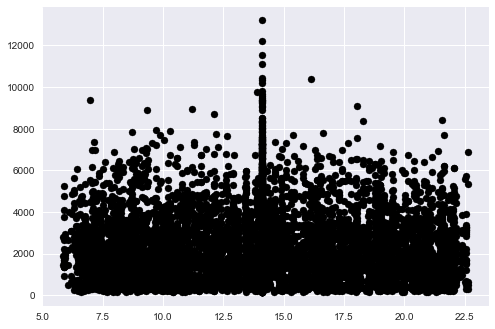

In [60]:
plt.scatter(y =train.Counterfeit_Sales,x = train.Counterfeit_Weight,c = 'black')
plt.show()
#we can see the outlier in the below image

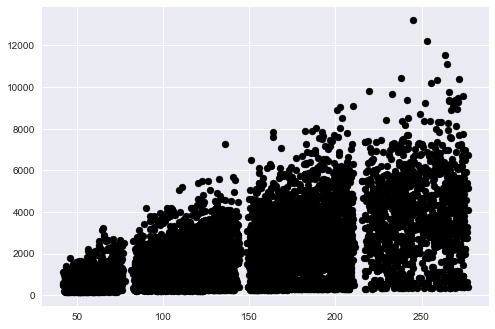

In [61]:
plt.scatter(y =train.Counterfeit_Sales,x =train.Medicine_MRP ,c = 'black')
plt.show()

In [62]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(["Counterfeit_Sales"], ascending = False, inplace = True)
print(corr.Counterfeit_Sales)
#this you can see at the time of heatmap also.

Find most important features relative to target
Counterfeit_Sales        1.000000
Medicine_MRP             0.573684
AT_CityLimits            0.306226
DID_Area027              0.306226
ADL_Medium               0.201764
AT_DownTown              0.115059
As_1983                  0.070694
ACT_Tier 2               0.065890
DID_Area035              0.051699
As_2002                  0.051699
ACT_Tier 3               0.045004
As_2005                  0.040880
DID_Area017              0.040880
DID_Area049              0.033378
As_1997                  0.033378
MT_Antibiotics           0.028050
As_1985                  0.026233
DID_Area013              0.026233
MT_Hreplacements         0.023062
MT_Antiseptics           0.017509
As_1995                  0.016212
DID_Area046              0.016212
MT_asa                   0.015026
MT_Cardiac               0.014012
As_2000                  0.006248
DID_Area045              0.006248
Counterfeit_Weight       0.004882
MT_Statins               0.002701


In [63]:
from sklearn.model_selection import train_test_split
X=train.drop(['Medicine_ID','Counterfeit_Sales','flag','Counterfeit_Weight'],1)
y= train['Counterfeit_Sales']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state= 0)


In [64]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV

In [65]:
n_folds = 5
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
#scorer = make_scorer(mean_squared_error,greater_is_better = False)
def rmse_CV_train(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_train,y_train,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

def rmse_CV_test(model):
    kf = KFold(n_folds,shuffle=True,random_state=42).get_n_splits(train.values)
    rmse = np.sqrt(-cross_val_score(model,X_test,y_test,scoring ="neg_mean_squared_error",cv=kf))
    return (rmse)

In [66]:
lr = LinearRegression()
lr.fit(X_train,y_train)
test_pre = lr.predict(X_test)
train_pre = lr.predict(X_train)


In [86]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, test_pre)
1-(mae/1660)

0.51341128850983386

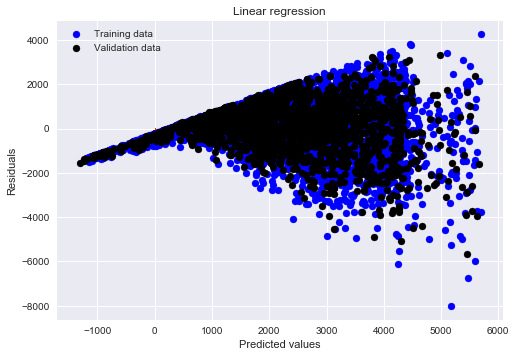

In [87]:
#plot between predicted values and residuals
plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

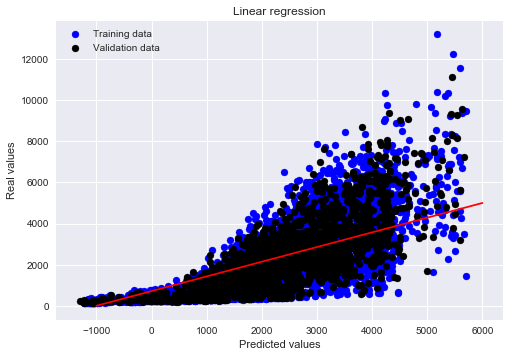

In [81]:
# Plot predictions - Real values
plt.scatter(train_pre, y_train, c = "blue",  label = "Training data")
plt.scatter(test_pre, y_test, c = "black",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([-1000, 6000], [0, 5000], c = "red")
plt.show()

In [70]:

#Regulization 
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

best alpha 30.0
Try again for more precision with alphas centered around 30.0
Best alpha : 21.0
Ridge RMSE on Training set : 1132.26182095
Ridge RMSE on Test set : 1085.67290003


In [71]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test, y_test_rdg)
1-(mae/1660)

0.51362680970334496

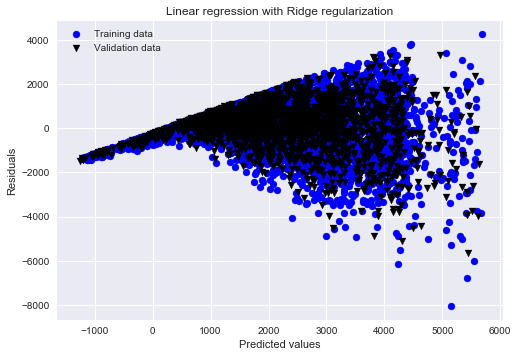

In [72]:
# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "black", marker = "v", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

In [ ]:
#Now working with test data

In [73]:
test.head()

,Availability_rating,Counterfeit_Sales,Counterfeit_Weight,Medicine_ID,Medicine_MRP,flag,DID_Area010,DID_Area013,DID_Area017,DID_Area018,...,MT_asa,mld,AT_CityLimits,AT_DownTown,AT_MidTownResidential,ACT_Tier 2,ACT_Tier 3,ADL_Medium,ADL_Small,ADL_Unknown
0,0.112747,NaN,14.151608,HLZ81,85.5328,1,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
1,0.144446,NaN,13.450000,ECE94,257.1460,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
2,0.144221,NaN,7.100000,SAD14,98.1172,1,0,0,0,0,...,0,1,0,1,0,1,0,0,0,1
3,0.100388,NaN,18.300000,EQV63,135.3730,1,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4,0.022585,NaN,14.151608,AIR10,112.8016,1,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0


In [76]:
report=pd.DataFrame()
report['Medicine_ID']=test['Medicine_ID']
test=test.drop(['Medicine_ID','Counterfeit_Sales','flag','Counterfeit_Weight'],1)

In [77]:
pred=ridge.predict(test)

In [78]:
pred

array([ 2799.16240902,  3945.63252864,  1469.45674728, ...,  2935.79813217,
        3828.41484217,  3823.73078876])

In [82]:
report['Counterfeit_Sales']=pred

In [95]:
report.to_csv('report.csv',index=False)

In [ ]:
working on fixing few of the negative prediction :(